In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
train_data=pd.read_csv("/home/uday/Uday/CDAC/YouTube/Krish/2-8-2020/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis
      - Let's begin some exploratory data analysis! Will start checking by missing data

## Missing Data
      - We can use seaborn to create a simple heatmap to see where are missing data

In [42]:
train_data.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


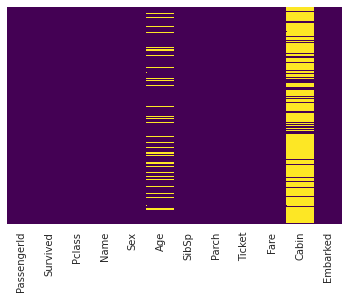

In [43]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap="viridis")

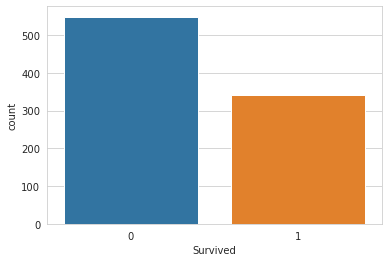

In [44]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",data=train_data)

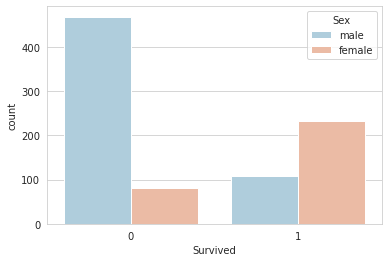

In [45]:
sns.countplot("Survived",hue="Sex",data=train_data,palette="RdBu_r")

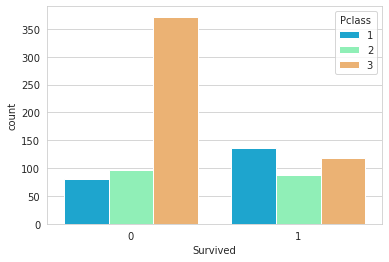

In [46]:
sns.countplot(x=train_data.Survived,hue=train_data.Pclass,data=train_data,palette="rainbow")

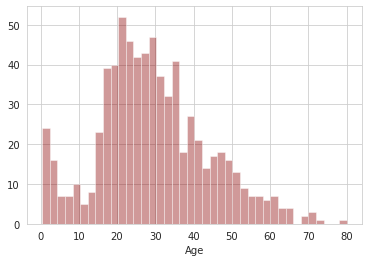

In [47]:
sns.distplot(train_data.Age.dropna(),kde=False,color="darkred",bins=40)

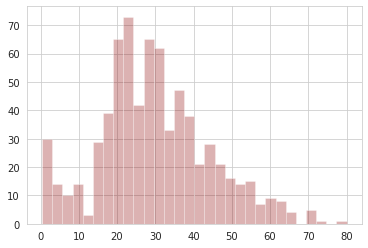

In [48]:
train_data.Age.hist(bins=30,color="darkred",alpha=.3)

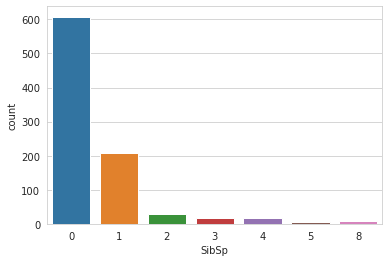

In [49]:
sns.countplot(x=train_data.SibSp,data=train_data)

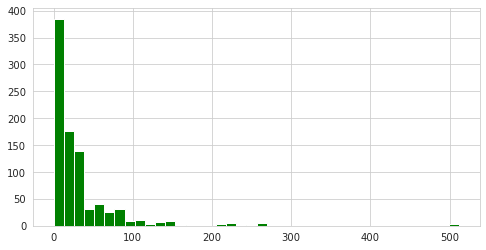

In [50]:
train_data.Fare.hist(color="green",bins=40,figsize=(8,4))

# Data Cleaning 
- Fill Nan of Age with mean (There is some relation between Pclass and Age)

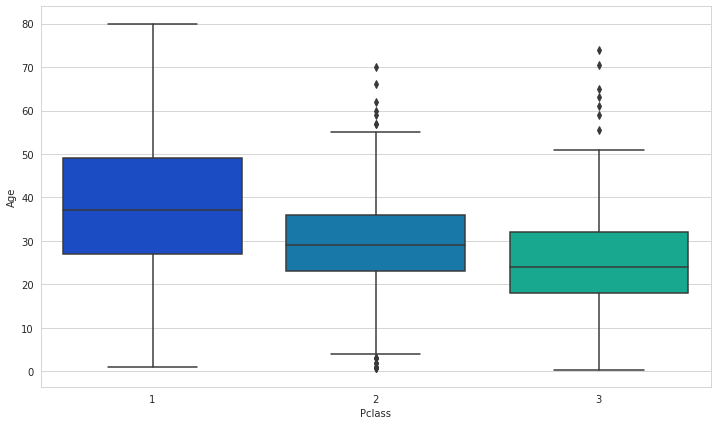

In [51]:
plt.figure(figsize=(12,7))
sns.boxplot(x="Pclass",y="Age",data=train_data,palette="winter")

In [52]:
train_data.loc[train_data.Pclass==1,"Age"].mean()
train_data.loc[train_data.Pclass==2,"Age"].mean()
train_data.loc[train_data.Pclass==3,"Age"].mean()
# A1=38
# A2=29
# A3=25
train_data.loc[train_data.Age.isna() & train_data.Pclass==1, "Age"]=38
train_data.loc[train_data.Age.isna() & train_data.Pclass==2, "Age"]=29 #Some Issue
# train_data.loc[train_data.Age.isnull(),"Age"]=29 
train_data.loc[train_data.Age.isna() & train_data.Pclass==3, "Age"]=25

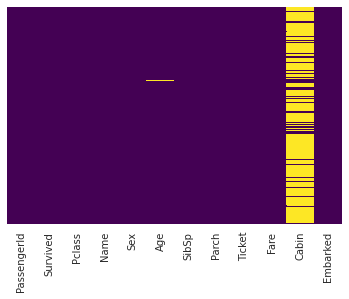

In [53]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [54]:
train_data.drop("Cabin",axis=1,inplace=True)

In [55]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [56]:
train_data.dropna(inplace=True)

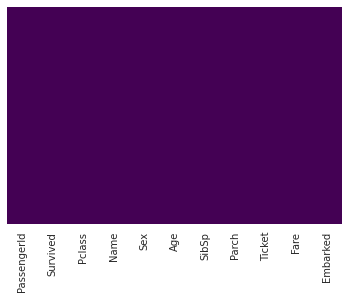

In [57]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [58]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  878 non-null    int64  
 1   Survived     878 non-null    int64  
 2   Pclass       878 non-null    int64  
 3   Name         878 non-null    object 
 4   Sex          878 non-null    object 
 5   Age          878 non-null    float64
 6   SibSp        878 non-null    int64  
 7   Parch        878 non-null    int64  
 8   Ticket       878 non-null    object 
 9   Fare         878 non-null    float64
 10  Embarked     878 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 82.3+ KB


## Converting Categorical Features

In [59]:
pd.get_dummies(train_data.Embarked,drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [60]:
sex=pd.get_dummies(train_data.Sex,drop_first=True).head()
Embark=pd.get_dummies(train_data.Embarked,drop_first=True).head()

In [61]:
train_data.drop(["PassengerId","Sex","Embarked","Name","Ticket"],axis=1,inplace=True)

In [23]:
# train_data.Fare=train_data.Fare.apply(lambda x: '{:,.2f}'.format)
# train_data.Fare=train_data.Fare.round(2)

In [62]:
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [63]:
train=pd.concat([train_data,sex,Embark],axis=1)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,0.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,1.0,0.0,1.0


# Logistic Regression

## Train Test Split

In [64]:
X=train_data.drop("Survived",axis=1)
train.drop("Survived",axis=1).head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1.0,0.0,1.0
1,1,38.0,1,0,71.2833,0.0,0.0,0.0
2,3,26.0,0,0,7.9250,0.0,0.0,1.0
3,1,35.0,1,0,53.1000,0.0,0.0,1.0
4,3,35.0,0,0,8.0500,1.0,0.0,1.0


In [65]:
y=train.Survived
train.Survived.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,train.Survived,test_size=.3,random_state=32)

 ## Training And Prediction

In [67]:
X.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


In [68]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()

In [70]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [71]:
prediction=logmodel.predict(X_test)

In [72]:
from sklearn.metrics import confusion_matrix
accuracy=confusion_matrix(y_test,prediction)

In [73]:
accuracy

array([[140,  37],
       [ 41,  46]])

In [74]:
from sklearn.metrics import accuracy_score
accuracy_score=accuracy_score(y_test,prediction)
accuracy_score

0.7045454545454546

In [75]:
prediction

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])